# CarDekho Exploratory Data Analysis

Hello there! In this project I will analyze CarDekho dataset to understand various factors influencing the selling price of the used cars by visualizing univariate and bivariate analysis.

## Importing Libraries

In [1]:
#Importing all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import missingno as msno

## Importing Data

In [2]:
#Reading the CSV file into a DataFrame
df = pd.read_csv(r"dataset\cardekho.csv")

In [3]:
#Displaying the first few rows of the DataFrame
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


## Step 1: Understanding Data 

In [4]:
#Checking the shape of the DataFrame
df.shape

(8128, 12)

In [5]:
#Providing basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


## EDA and Data Wrangling

#### Changing Data Type

In [6]:
#Converting 'max_power' column to numeric

df["max_power"] = pd.to_numeric(df["max_power"], errors='coerce')
df["max_power"] = df["max_power"].astype(float)

In [7]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power             float64
seats                 float64
dtype: object

#### Null values

In [8]:
#Calculating percentage of missing values for each column

missing_percentage = df.isnull().mean()*100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.657480
seats                 2.718996
dtype: float64


<Axes: >

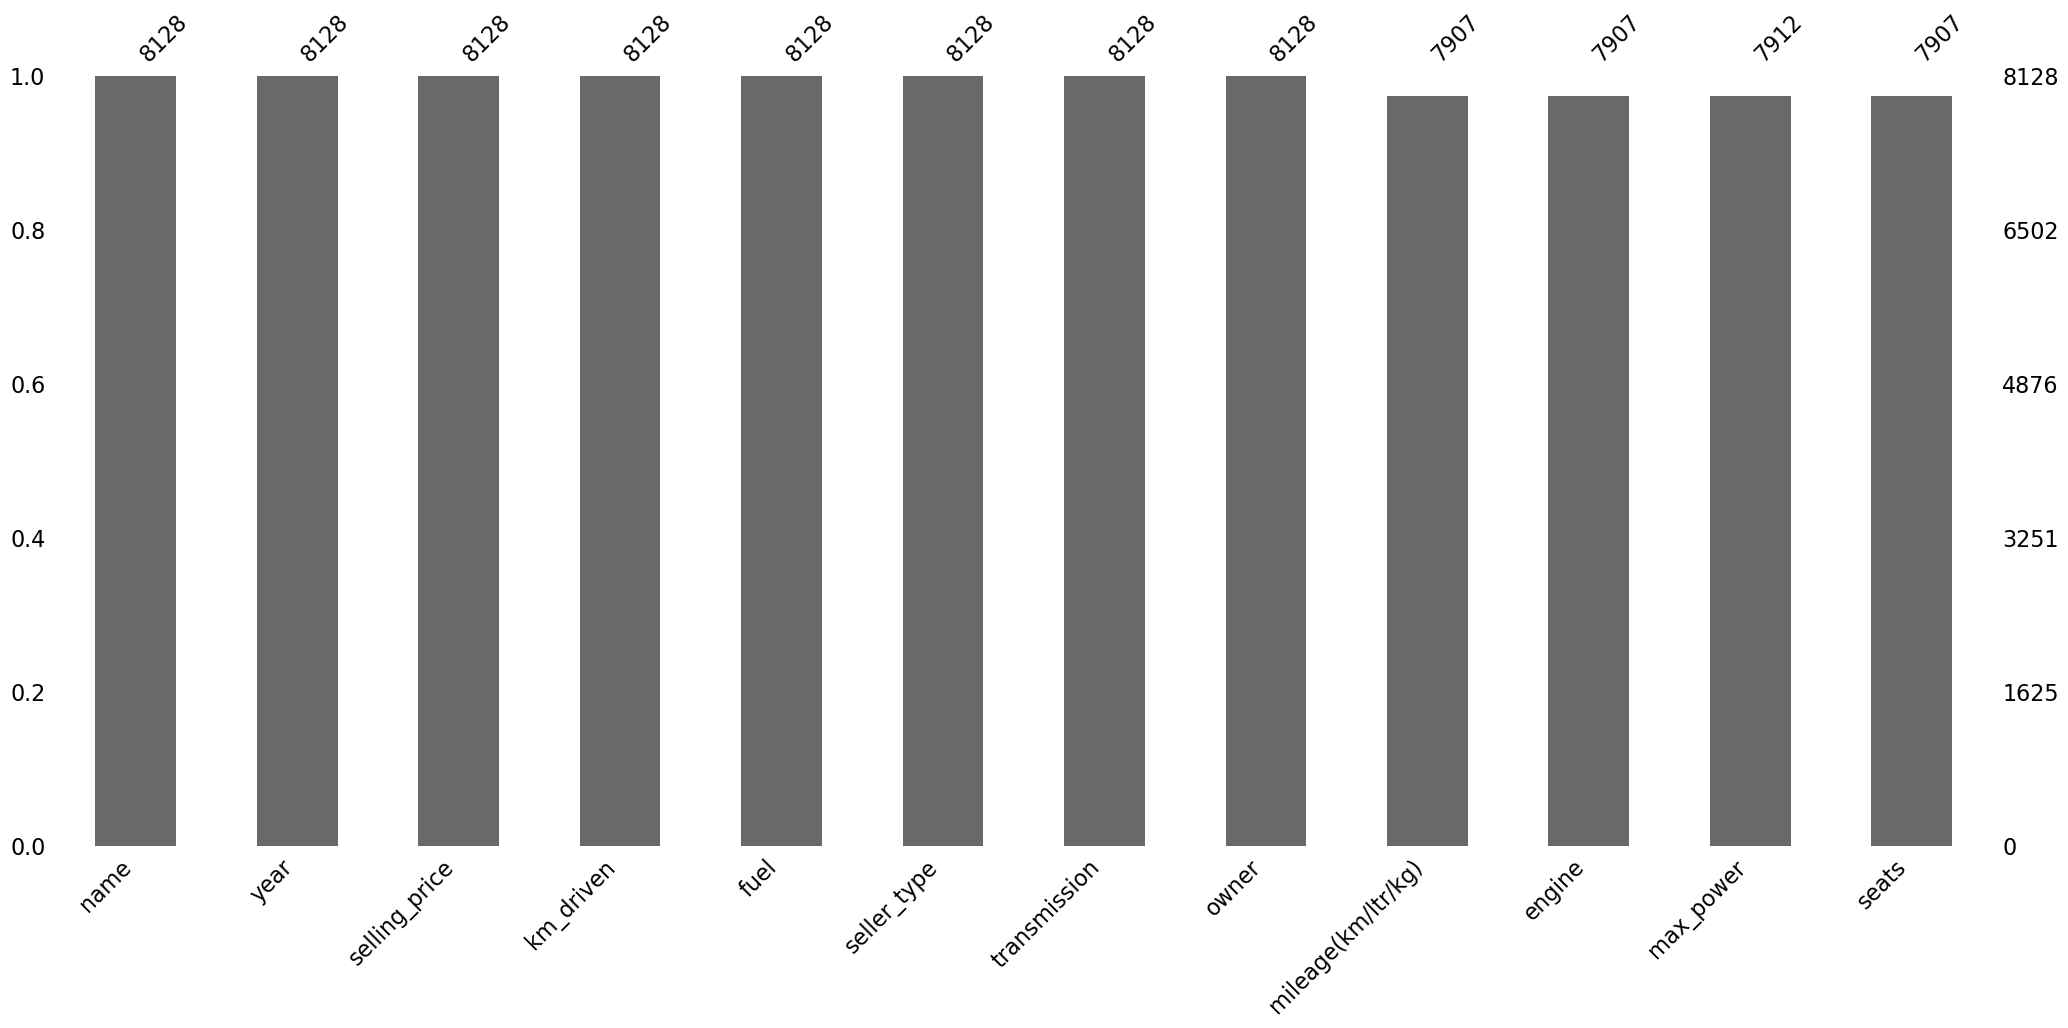

In [9]:
#Visualizing missing values using missingno library
msno.bar(df)

All the columns with missing values are numerical data type. We'll check for outliers before we impute the data. 
Let's divide the columns into numerical and categorical types. 

In [10]:
#Identifying numerical columns

numerical_columns =[]

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numerical_columns.append(column)
        
print("Numeric columns: ", numerical_columns)

Numeric columns:  ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']


##### Outlier Detection

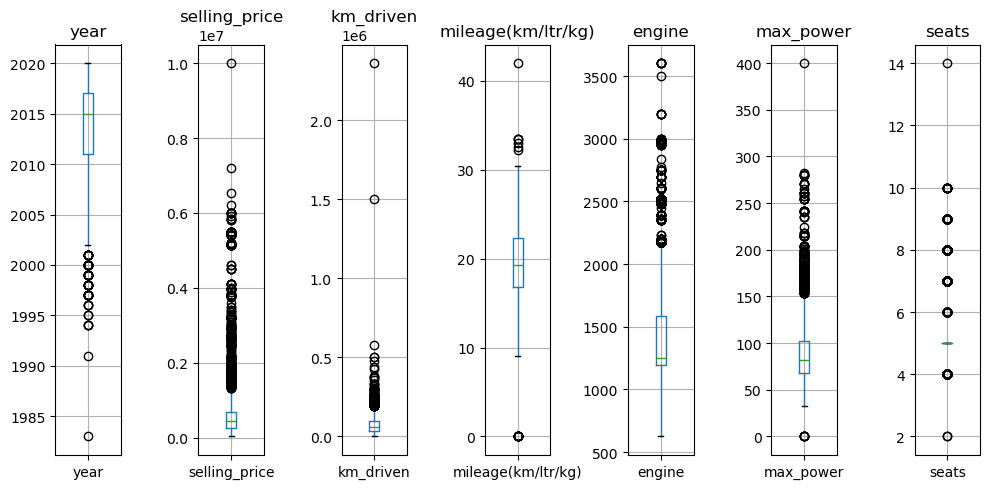

In [11]:
#To decide the means of inputation, firstly checking for the outliers

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(10,5))

for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)
    
plt.tight_layout()
plt.show()

##### Missing value imputation

In [12]:
#Since the data has a lot of outliers. Median will be used for missing value imputation.

columns_to_impute = ["mileage(km/ltr/kg)", "engine", "max_power", "seats"]

for column in columns_to_impute:
    df[column].fillna(df[column].median(), inplace=True)

In [13]:
#Checking if there are missing values

missing_after_imputation = df.isnull().sum()
print(f"Missing value count after imputation:")
print(missing_after_imputation)

Missing value count after imputation:
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


#### Duplicate values

In [14]:
#Checking for duplicate rows

duplicates = df[df.duplicated()]
print(f'{len(duplicates)} are duplicate rows out of {len(df)} ')

1202 are duplicate rows out of 8128 


In [15]:
#Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(6926, 12)

#### Feature Trasnformation

In [17]:
#Creating a new column 'brand' by extracting brand name from 'name' column
df["brand"] = df["name"].apply(lambda x: x.split()[0])

In [18]:
#Creating a new column 'age' using 'year' column

#Getting the current year
current_year = pd.Timestamp.now().year

#Calculate age by subtracting manufacturing year from current year
df["age"] = current_year - df["year"]

In [31]:
#Adding 'age' in numerical_columns list 
numerical_columns.append('age')

In [19]:
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,10
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,10


#### Descriptive Statistics 

In [20]:
#Displaying descriptive statistics of the DataFrame
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age
count,6926,6926.000000,6.926000e+03,6.926000e+03,6926,6926,6926,6926,6926.000000,6926.000000,6926.000000,6926.000000,6926,6926.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,32,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,Maruti,NaN
freq,118,NaN,NaN,NaN,3755,6218,6342,4242,NaN,NaN,NaN,NaN,2165,NaN
mean,NaN,2013.420300,5.172707e+05,7.399568e+04,NaN,NaN,NaN,NaN,19.460345,1425.398787,87.556583,5.421600,NaN,10.579700
std,NaN,4.078286,5.197670e+05,5.835810e+04,NaN,NaN,NaN,NaN,3.987976,487.026967,31.310612,0.972171,NaN,4.078286
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,4.000000e+04,NaN,NaN,NaN,NaN,16.950000,1197.000000,68.000000,5.000000,NaN,7.000000
50%,NaN,2014.000000,4.000000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,81.860000,5.000000,NaN,10.000000
75%,NaN,2017.000000,6.335000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.320000,1498.000000,99.000000,5.000000,NaN,13.000000


#### Unique Values 

In [21]:
#Displaying unique values of categorical columns

cat_columns = ["brand", "fuel", "seller_type", "transmission", "owner"]

for column in cat_columns:
    print(f'{column}: {df[column].unique()}')

brand: ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
transmission: ['Manual' 'Automatic']
owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


#### Final Data

In [22]:
#Fitering out rows where 'year' is before 2000
df = df[df['year'] >= 2000]

In [23]:
#Dropping columns we wouldn't need
df.drop(['name', 'year'], axis=1, inplace=True)

In [29]:
#Removing 'year' from numeric_columns list
numerical_columns.remove('year')

In [25]:
df.describe(include='all')

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,age
count,6.878000e+03,6.878000e+03,6878,6878,6878,6878,6878.000000,6878.000000,6878.000000,6878.000000,6878,6878.000000
unique,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,30,NaN
top,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,Maruti,NaN
freq,NaN,NaN,3744,6170,6295,4236,NaN,NaN,NaN,NaN,2131,NaN
mean,5.202966e+05,7.394073e+04,NaN,NaN,NaN,NaN,19.479042,1427.898372,87.766923,5.427159,NaN,10.466269
std,5.202850e+05,5.847064e+04,NaN,NaN,NaN,NaN,3.993036,487.034864,31.271510,0.971531,NaN,3.852442
min,3.000000e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000,NaN,4.000000
25%,2.500000e+05,3.909875e+04,NaN,NaN,NaN,NaN,17.000000,1197.000000,68.000000,5.000000,NaN,7.000000
50%,4.099990e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,81.860000,5.000000,NaN,10.000000
75%,6.400000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.320000,1498.000000,99.000000,5.000000,NaN,13.000000


## Univariate analysis

#### 1. Categorical Data

In [26]:
#Identifying categorical columns

category_columns = []

for column in df.columns:
    if pd.api.types.is_string_dtype(df[column]):
        category_columns.append(column)


print("Category columns: ", category_columns)

Category columns:  ['fuel', 'seller_type', 'transmission', 'owner', 'brand']


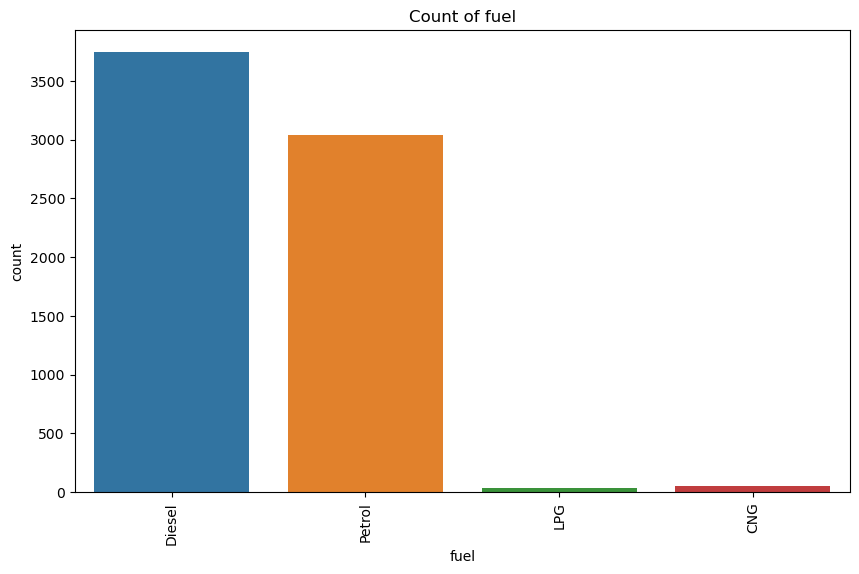

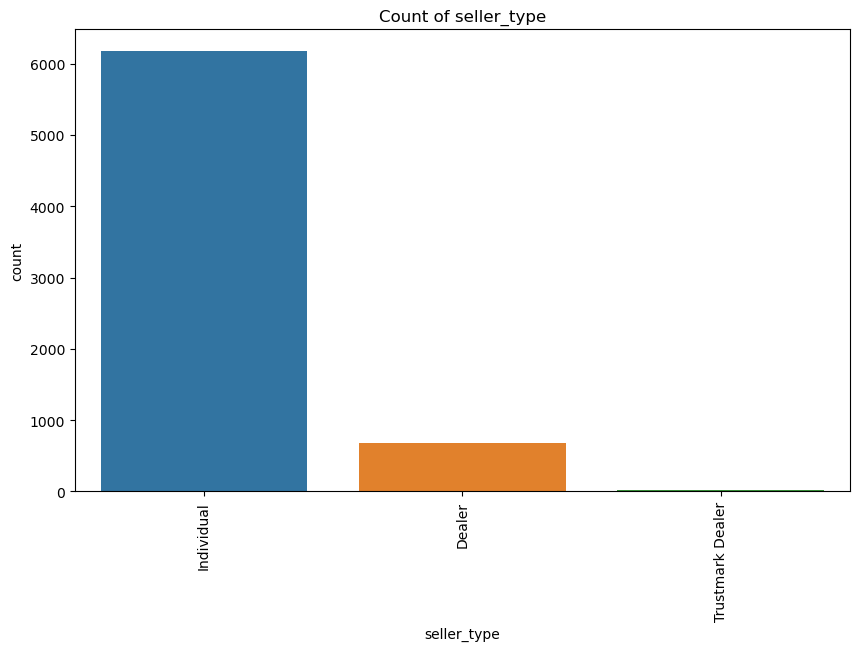

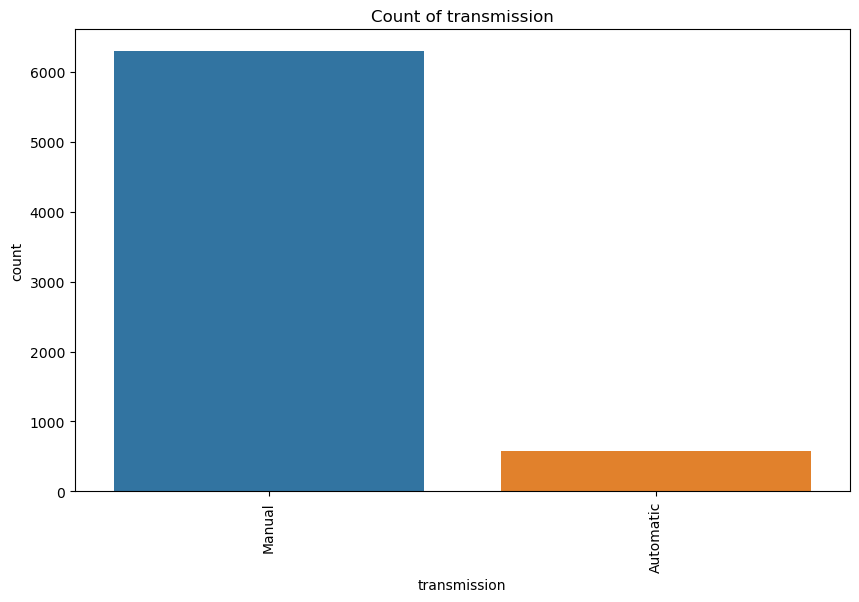

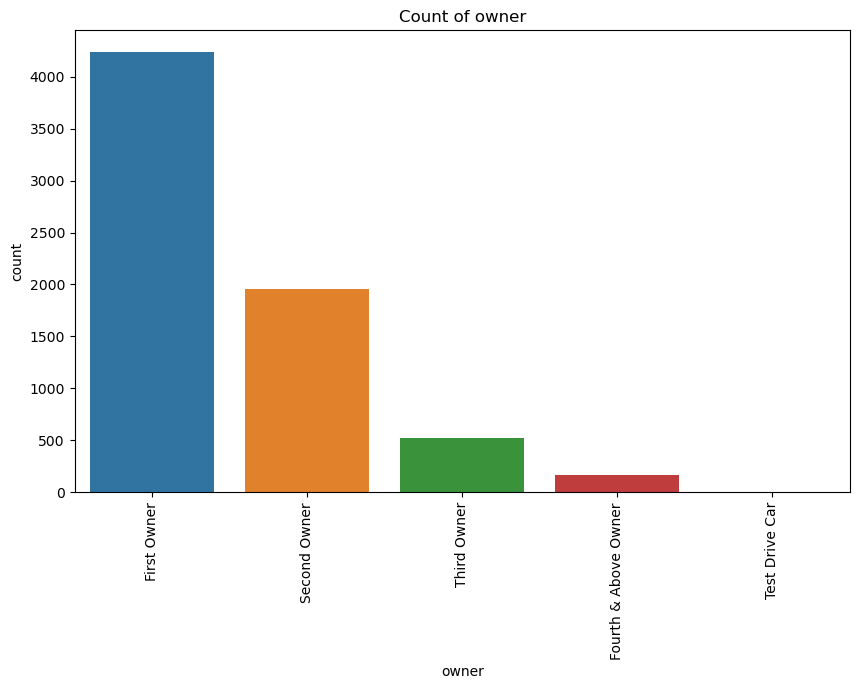

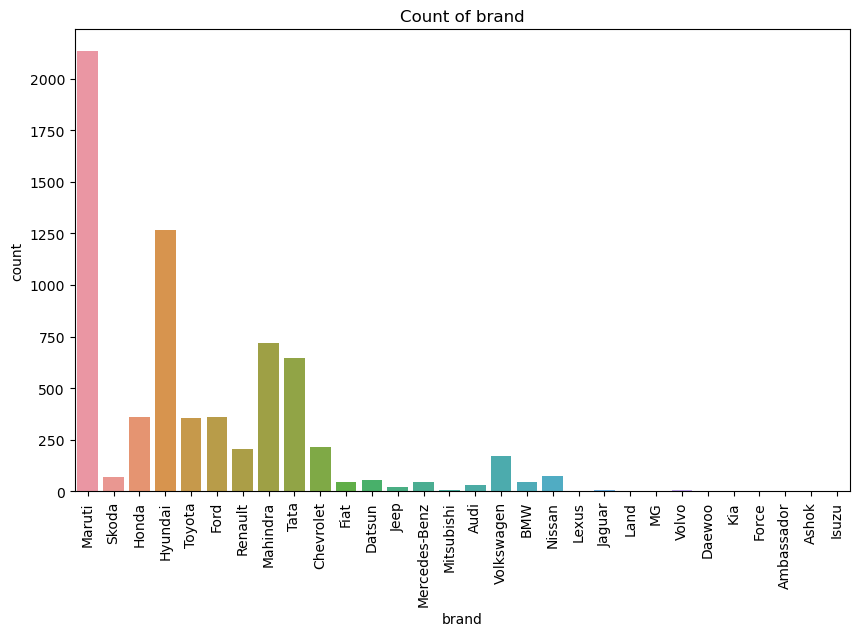

In [27]:
#Visualizing count of each category for categorical columns

for column in category_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Count of {column}")
    plt.xticks(rotation=90)
    plt.show()

#### Numeric Data

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


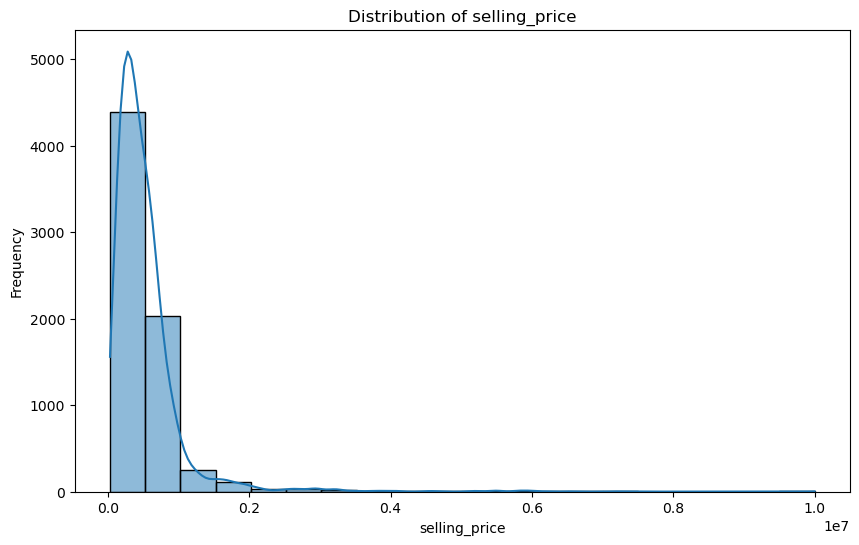

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


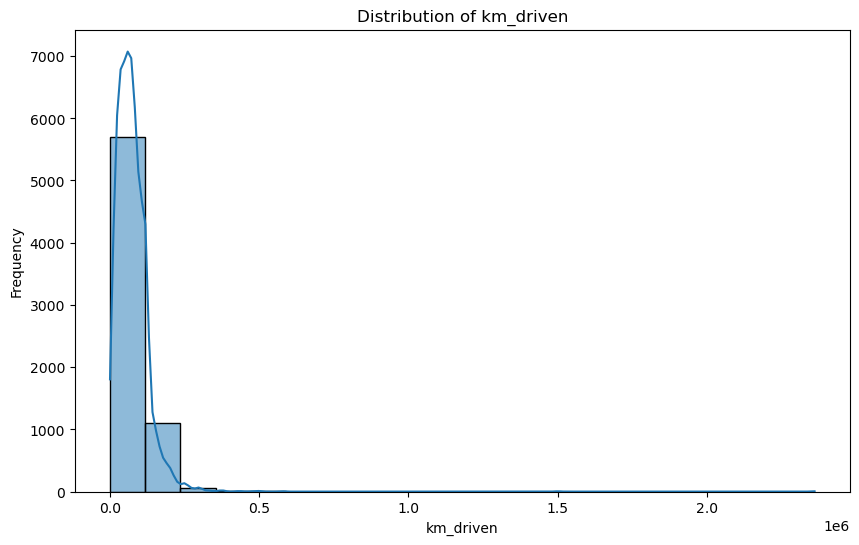

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


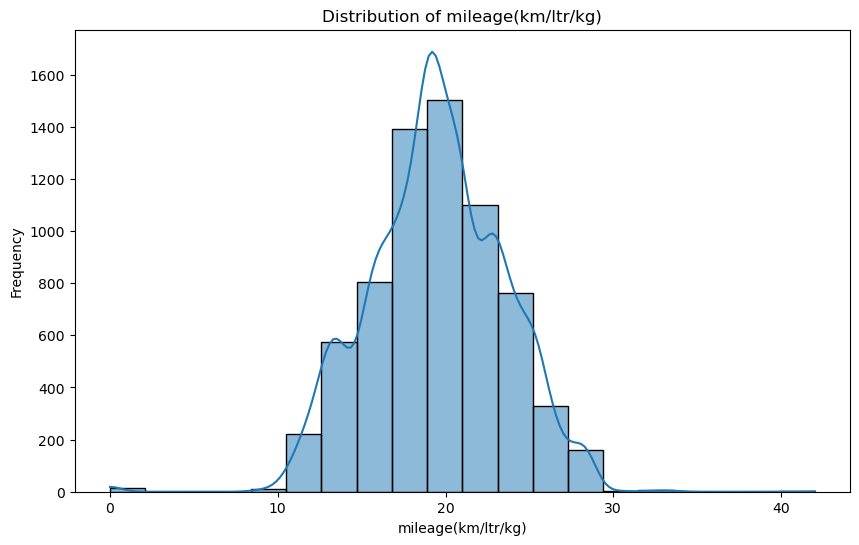

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


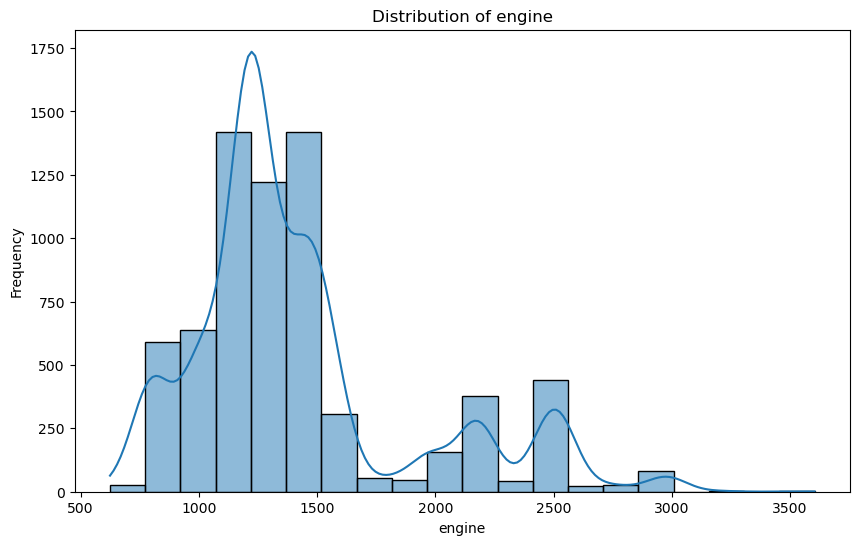

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


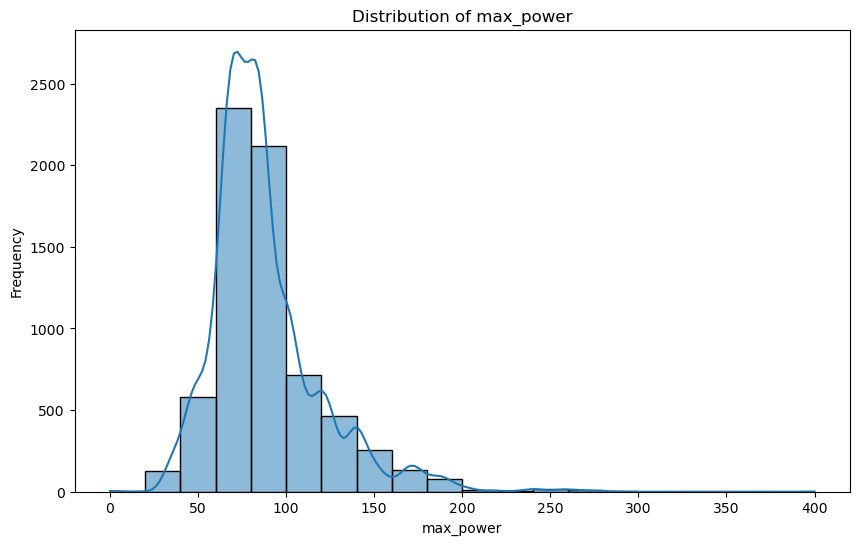

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


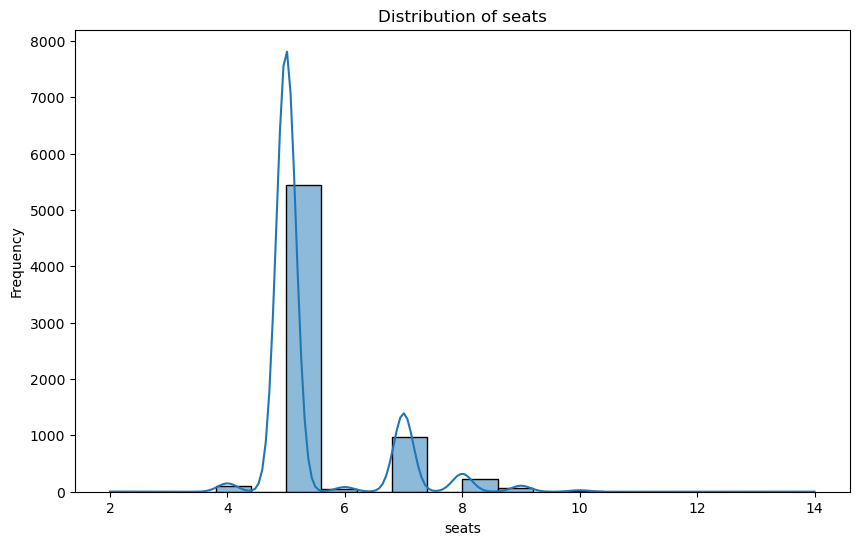

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


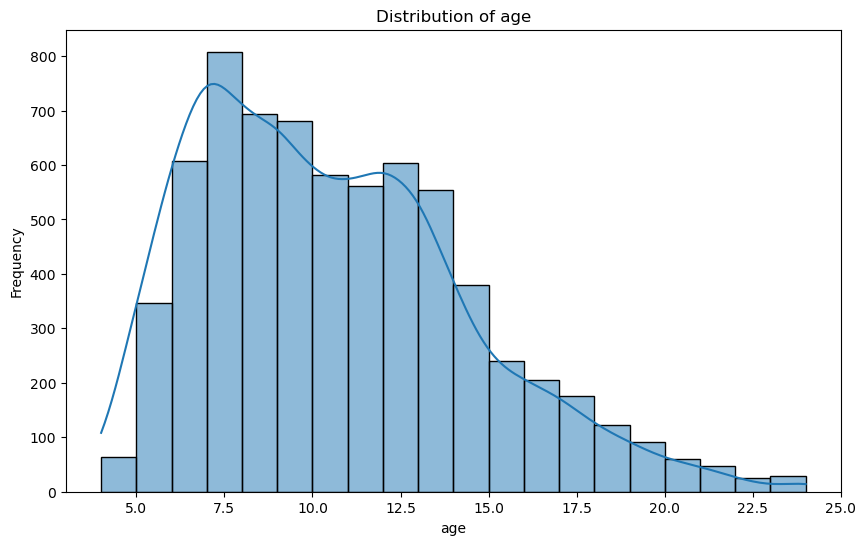

In [32]:
#Visualizing distribution of numerical columns

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=column, data=df, bins=20, kde=True)  # Adjust bins and kde as needed
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


## Bivariate Analysis

#### 1. Numeric Data

##### Sactter Plot

E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

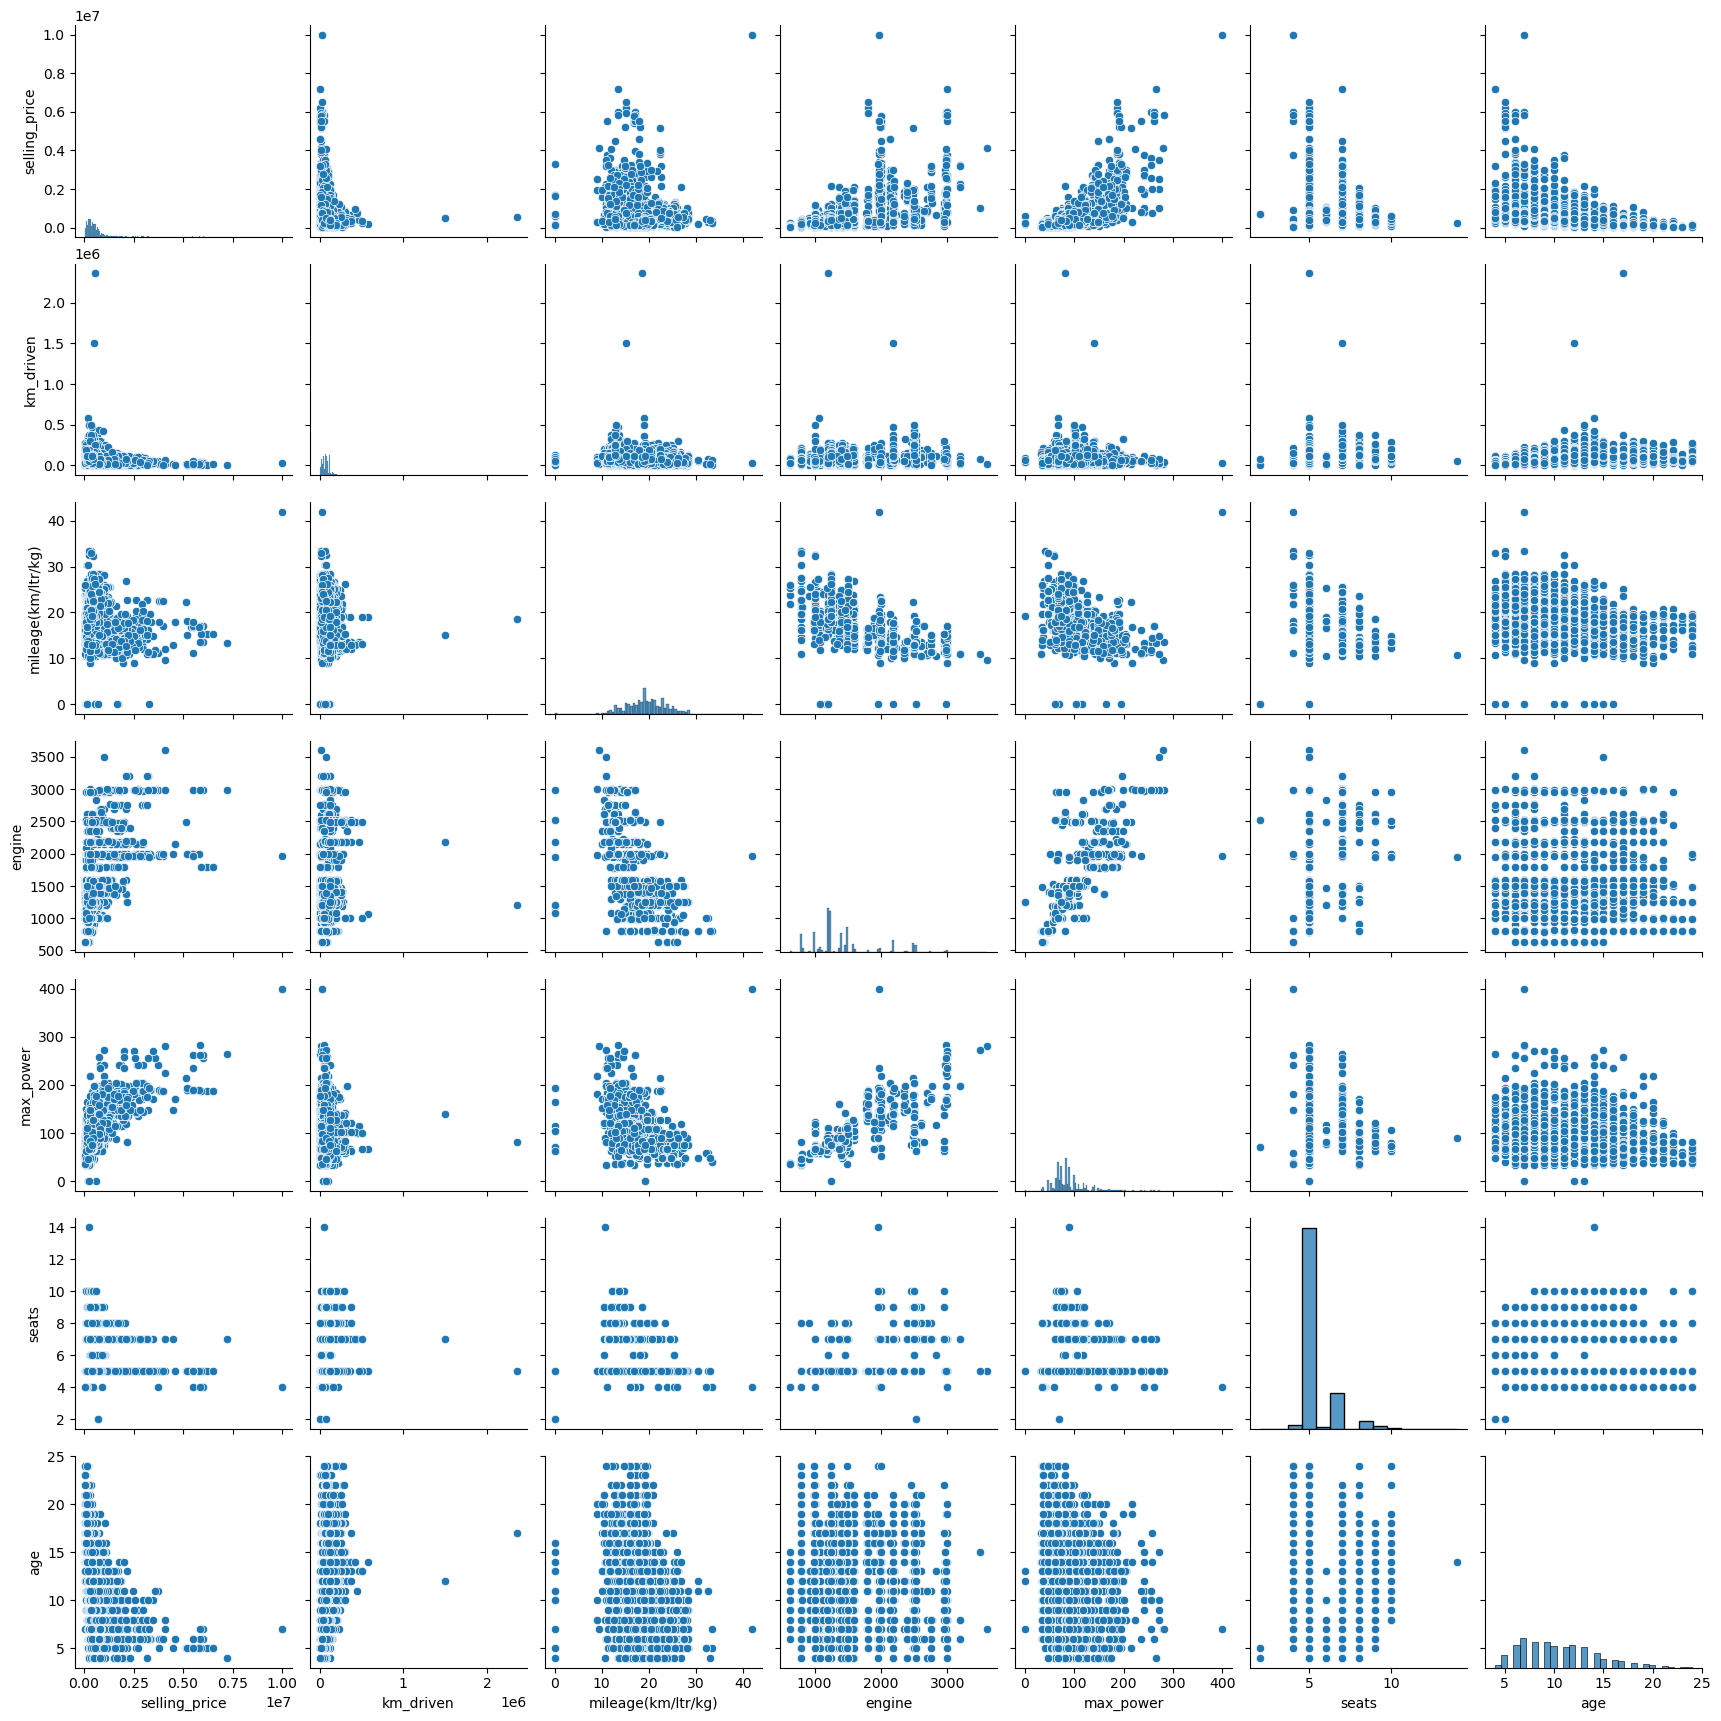

In [33]:
#Visualizing pairplot for numerical columns

sns.pairplot(df[numerical_columns])
plt.show()         

###### Insight:

1. Correlation between "selling_price" and "max_power"
2. Correlation between "selling_price" and "engine"
3. Correlation between "engine" and "max_power"
4. "age" has a weak negative correlation with "selling_price"

##### Heat Map

<function matplotlib.pyplot.show(close=None, block=None)>

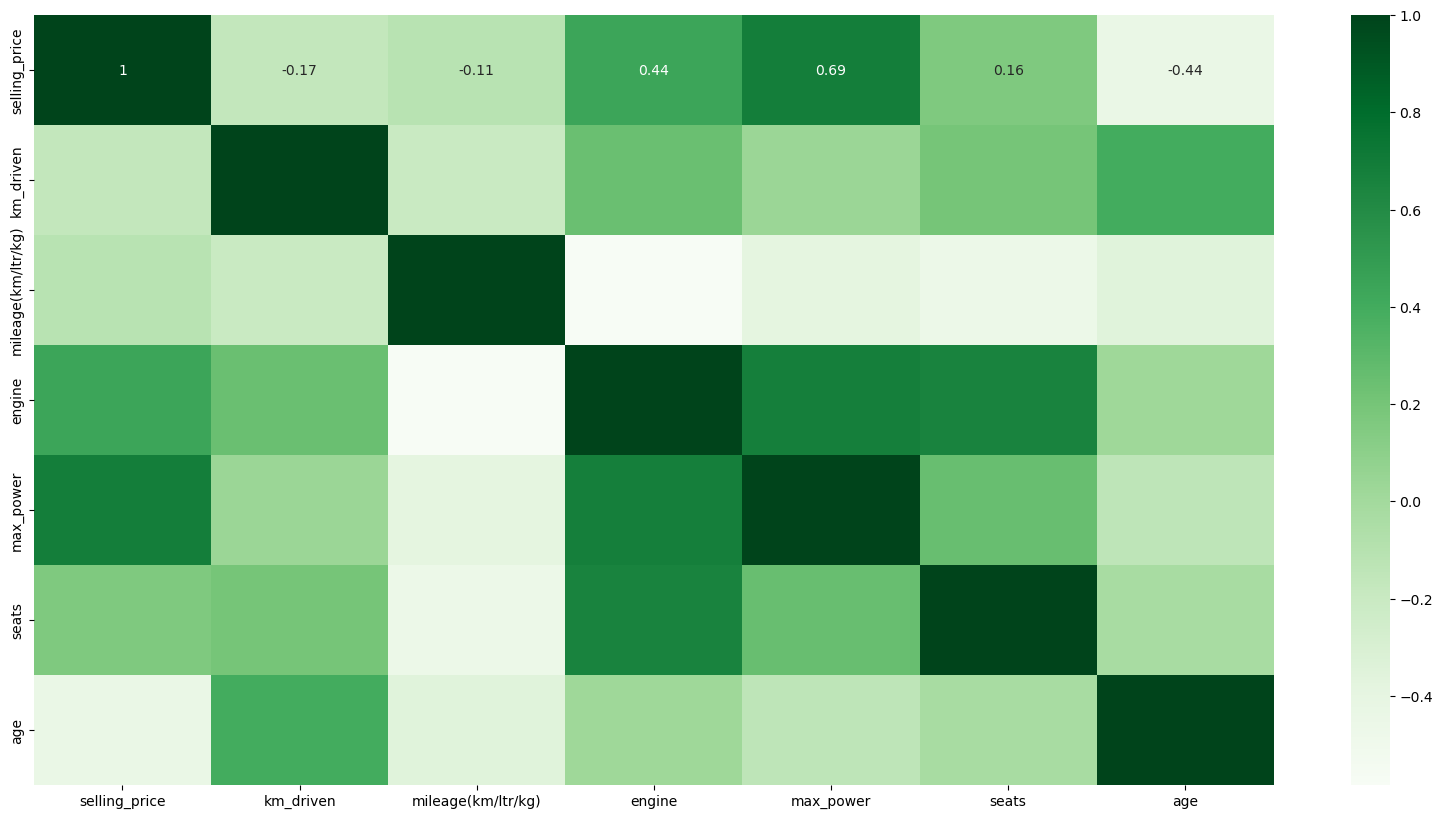

In [34]:
#Calculating correlation matrix
corr_matrix = df[list(numerical_columns)].corr()

#Visualizing correlation matrix using heatmap
plt.figure(figsize=[20, 10])
sns.heatmap(corr_matrix, cmap='Greens', annot=True)
plt.show

###### The heatmap confirms whether our observations from the pairplot were accurate. It shows a strong correlation between engine size and maximum power with selling price.

In [35]:
print(corr_matrix)

                    selling_price  km_driven  mileage(km/ltr/kg)    engine  \
selling_price            1.000000  -0.165568           -0.111277  0.442824   
km_driven               -0.165568   1.000000           -0.194907  0.247397   
mileage(km/ltr/kg)      -0.111277  -0.194907            1.000000 -0.583534   
engine                   0.442824   0.247397           -0.583534  1.000000   
max_power                0.687808   0.039971           -0.385536  0.681484   
seats                    0.159835   0.201540           -0.464826  0.658250   
age                     -0.436747   0.397721           -0.350324  0.022597   

                    max_power     seats       age  
selling_price        0.687808  0.159835 -0.436747  
km_driven            0.039971  0.201540  0.397721  
mileage(km/ltr/kg)  -0.385536 -0.464826 -0.350324  
engine               0.681484  0.658250  0.022597  
max_power            1.000000  0.254785 -0.141176  
seats                0.254785  1.000000 -0.021092  
age        

#### Categorial data 










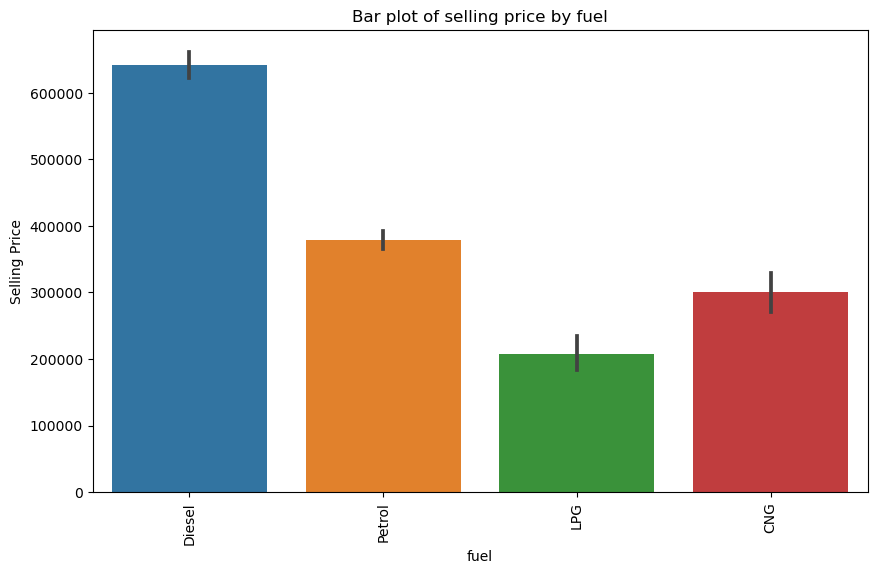

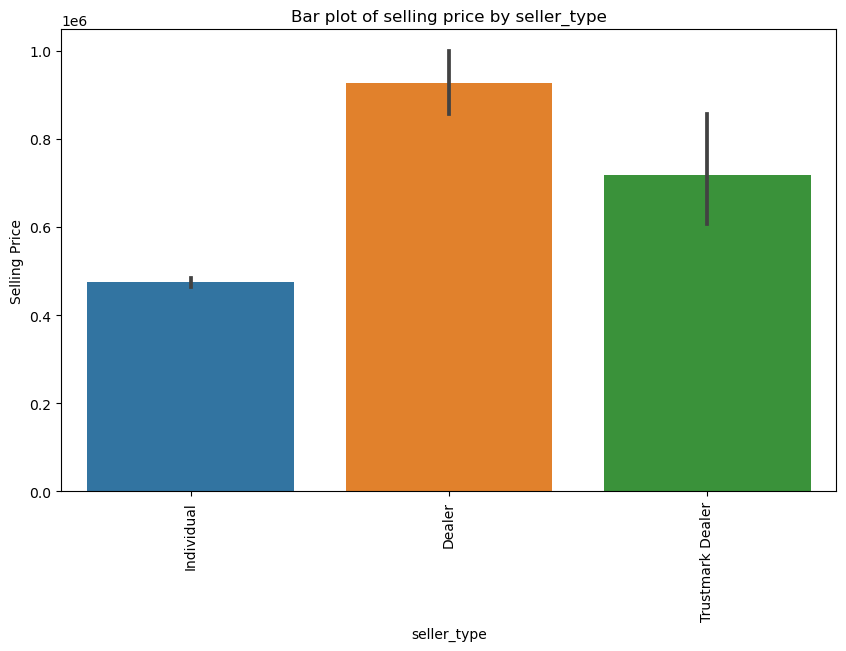

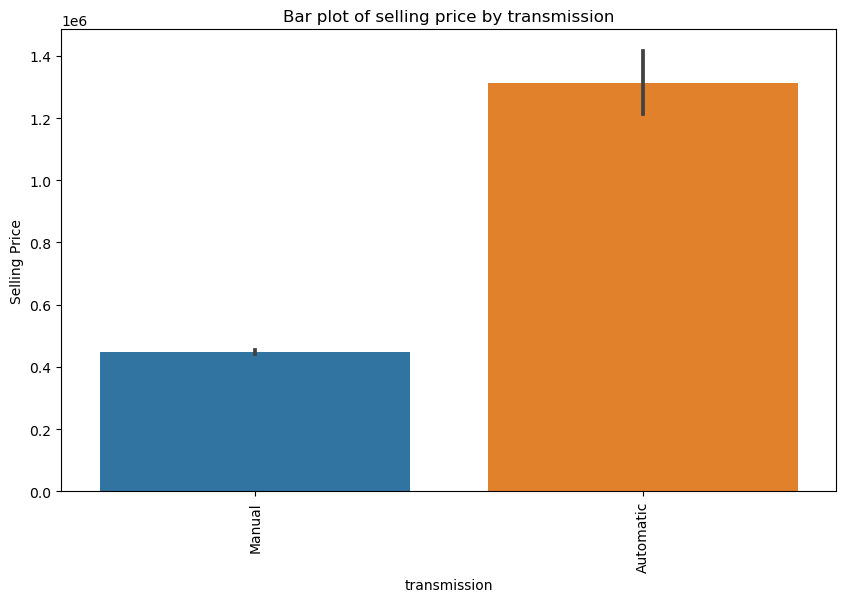

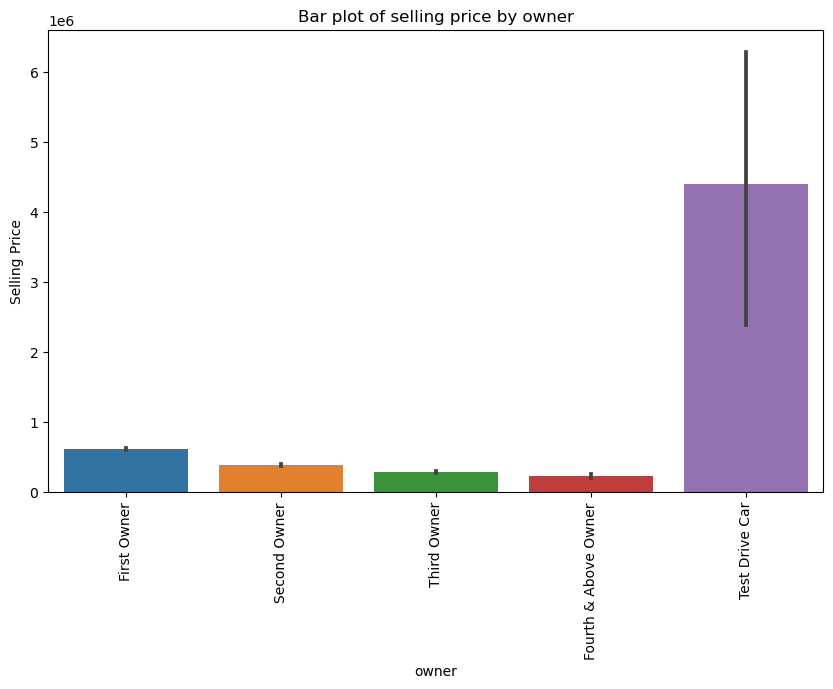

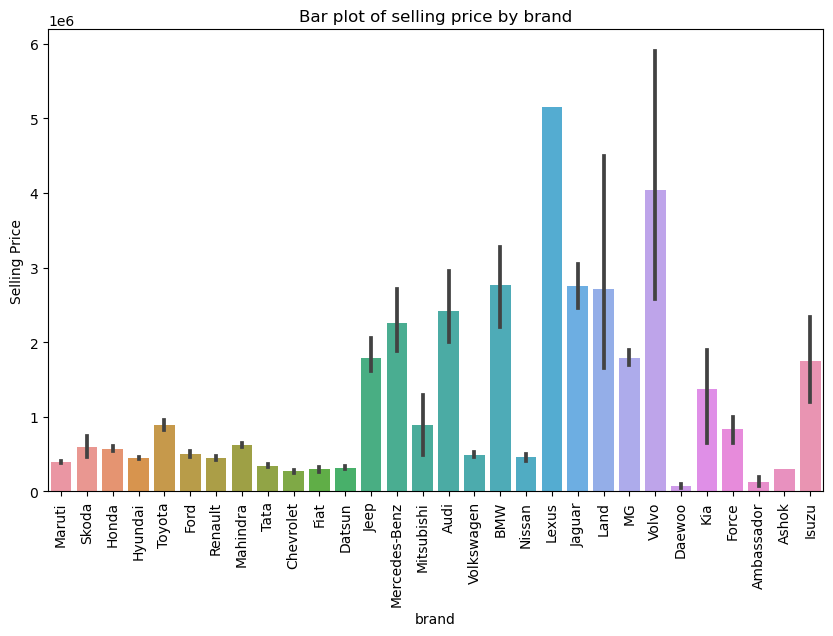

In [36]:
#Visualizing average selling price by category for categorical columns

for column in category_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=column, y='selling_price', data=df)
    plt.title(f'Bar plot of selling price by {column}')
    plt.xlabel(column)
    plt.ylabel('Selling Price')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


###### Insight:

1. "brands" with lower average "selling_price" have greater count
2. Diesel cars have more selling price than other cars
3. "selling_price" is apposite to be heigher when Dealers are the "seller_type"
4. Automatic cars are priced higher
5. The test drive cars are having huge prices compared to other classes cars that have been bought onre or more times. 

# Conclusion

In this analysis, we performed exploratory data analysis (EDA) on a dataset containing information about used cars. Here's a summary:

1. **Data Quality**: We started by examining the data quality, which included checking for missing values, outliers, and duplicates. We found missing values in numerical columns, which we imputed using median values due to the presence of outliers. Additionally, we removed duplicate rows to ensure data integrity.

2. **Feature Transformation**: We transformed the 'name' column into the 'brand' column by extracting the brand name an calculated 'age' column using 'year' column.

3. **Descriptive Statistics**: Descriptive statistics provided insights into the central tendency, dispersion, and shape of the numerical data.

4. **Univariate Analysis**: We explored the distribution and frequency of individual variables. Notable observations include the differences in selling prices across different categories such as fuel type, seller type, and transmission type.

5. **Bivariate Analysis**: We examined relationships between pairs of variables, particularly focusing on correlations between numerical variables. We found strong positive correlations between selling price and engine size, as well as selling price and maximum power. Surprisingly, the negative correlation between 'age' of the car and its 'selling_price' was weak. 

6. **Insights**: Through our analysis, we gained insights into factors influencing selling prices of used cars. These include the brand, fuel type, seller type, transmission type, and ownership history. For instance, diesel cars tend to have higher selling prices than petrol cars, and automatic transmission cars are generally priced higher than manual transmission cars.

##### Overall, this analysis provides valuable insights for both sellers and buyers of used cars. Sellers can utilize these insights to price their cars competitively based on features such as brand, fuel type, transmission, and ownership history, while buyers can use this information to understand the factors influencing the selling price of a used car and make informed decisions.